This Jupyter Notebook runs Inc/generate_function.py

# Generating synthetic function

In [5]:
root_directory = '/Users/vojtechremis/Desktop/bachelorproject/'

from Inc import generate_function
import numpy as np

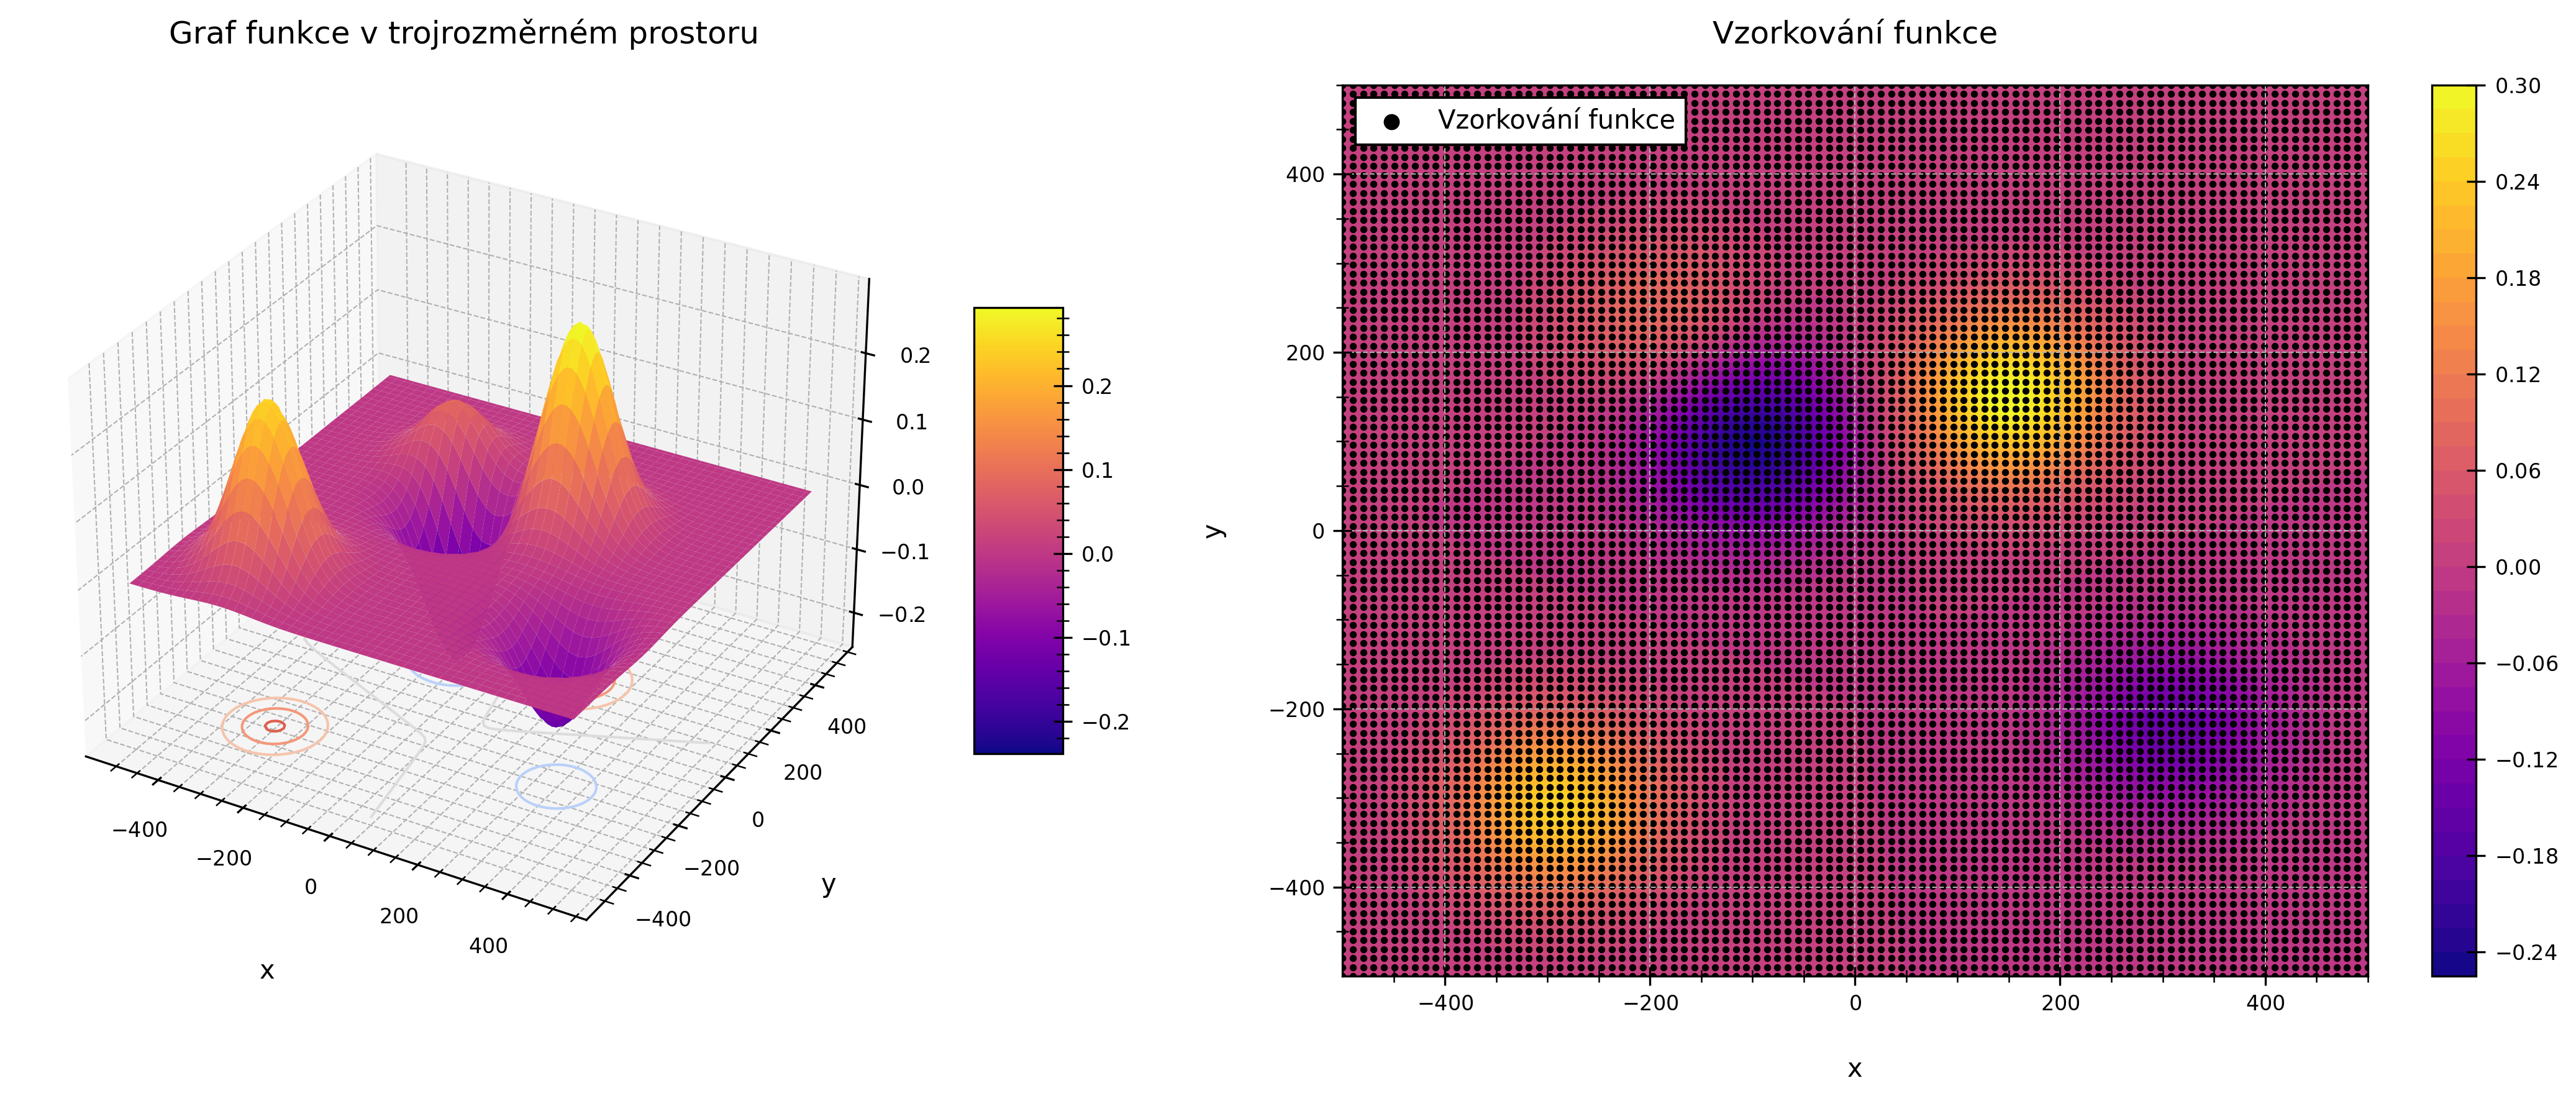

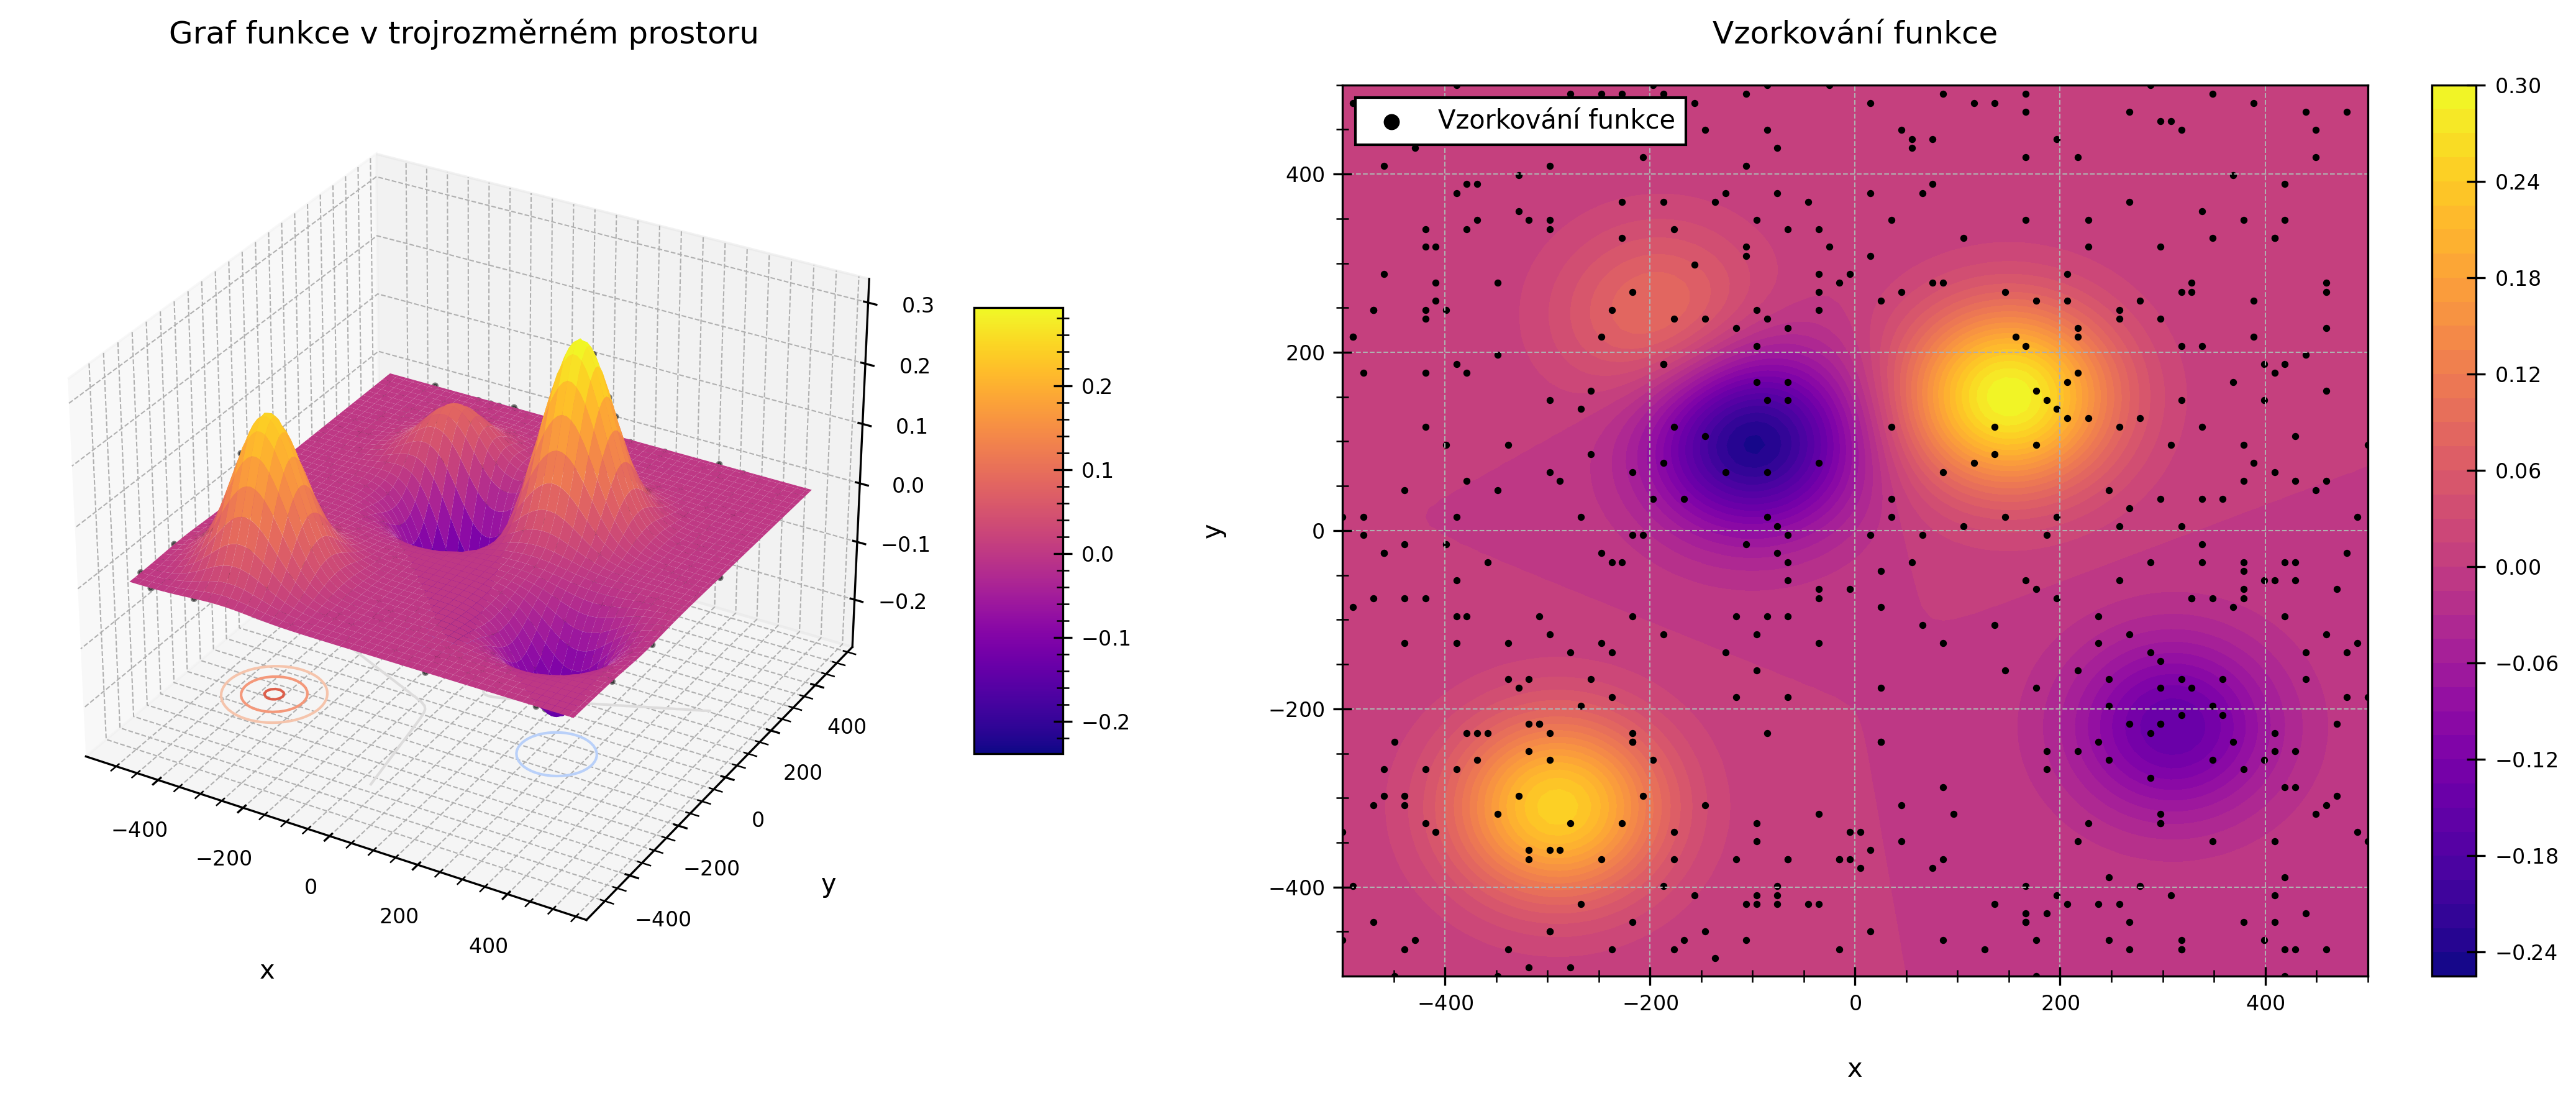

16:36:52	Root function has been saved.
16:36:52	Root function has been saved.
16:36:52	Function has been saved!


In [6]:
SF = generate_function.SyntheticFunction(dimension=2) # Initializing class and setting dimensions (implemented for any R^n -> R function)

"""
def f(x, y):
    def peak(x, y, x_origin, y_origin, amplitude):
        return amplitude*np.exp(
            -(
                np.power( (x - x_origin), 2 ) + np.power( (y - y_origin), 2 )
            )
        )
    
    return peak(x, y, 0.5, 0.5, 0.3) + peak(x, y, -0.3, 0.3, -0.25) + peak(x, y, 2.2, -2.2, -0.05) + peak(x, y, -2.8, -2.2, 0.08) + peak(x, y, -2.8, 2.2, 0.03)
"""

# Function definition
def f(x, y):
    def peak(x, y, x_origin, y_origin, amplitude, stretch):
        return amplitude*np.exp(
            -(
                ( np.power( (x - x_origin), 2 ) + np.power( (y - y_origin), 2 ) ) / stretch
            )
        )
    
    return peak(x, y, 150, 150, 0.3, 10000) + peak(x, y, -100, 100, -0.25, 10000) + peak(x, y, 310, -220, -0.15, 10000) + peak(x, y, -290, -310, 0.25, 10000) + peak(x, y, -190, 240, 0.10, 10000)

# Noise definition
def noise(x, y, noise_level=0.05):
    return noise_level * np.random.randn(*x.shape)

# Ppossibility to sample a subset of the dataset using a custom distribution, though only uniform distribution is used in the thesis.
def sample_distribution(numberOfSamples): # Return array of points from [0, 0.9] by given distribution
    mean = 0.5
    std_dev = 0.2
    generatedSamples = np.random.normal(mean, std_dev, numberOfSamples)
    generatedSamples = np.clip(generatedSamples, 0, 0.9)
    return generatedSamples

SF.setFunction(f)
SF.setNoise(noise)
SF.setSampleDistribution(sample_distribution)

SF.generate(numberOfRootSamples=100, dimension=2, interval=[(-500, 500), (-500, 500)], noise=False)


SF.subset(500, 'uniform')

SF.save('_thesis')

# Load function and plot visualizations

16:42:08	Samples file has been loaded.
16:42:08	Values important for comparison of approximated values in 3_Train section: normMinMaxColor = [-0.24347023339288767, 0.2987879885373313].


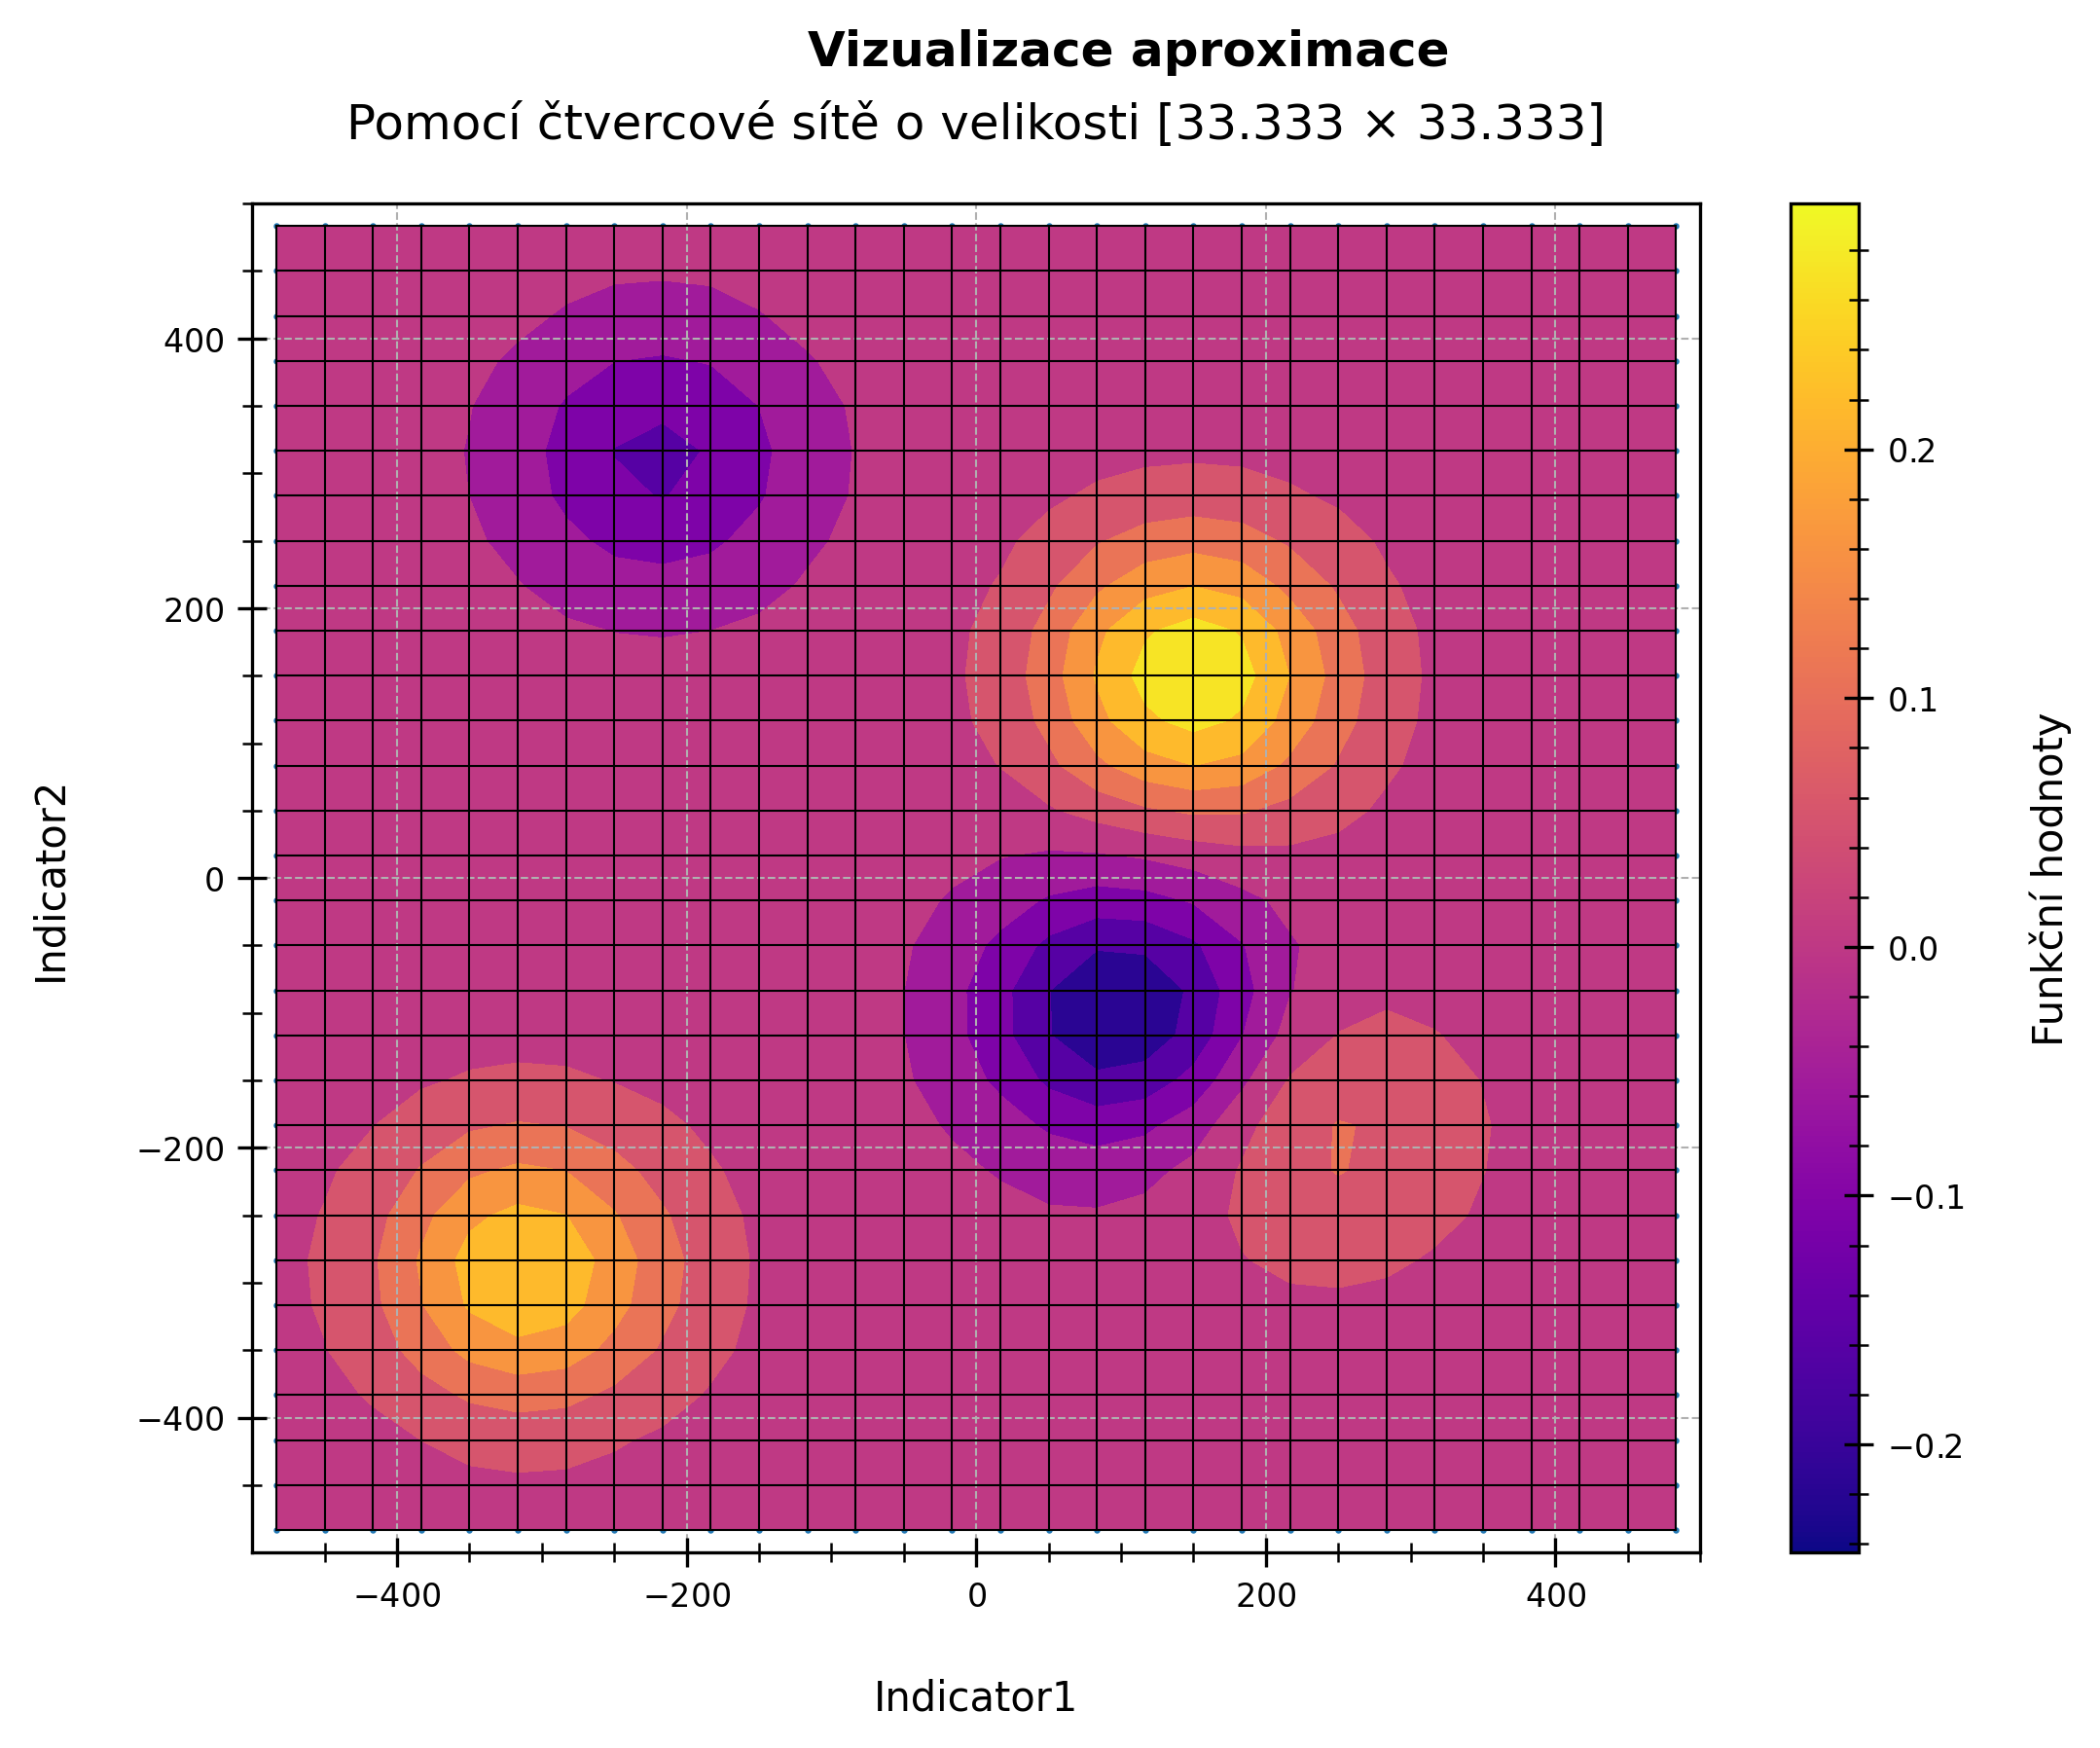

16:42:09	Execution time of [Pomocí čtvercové sítě o velikosti [33.333 × 33.333]]: 0.5105319023132324 seconds


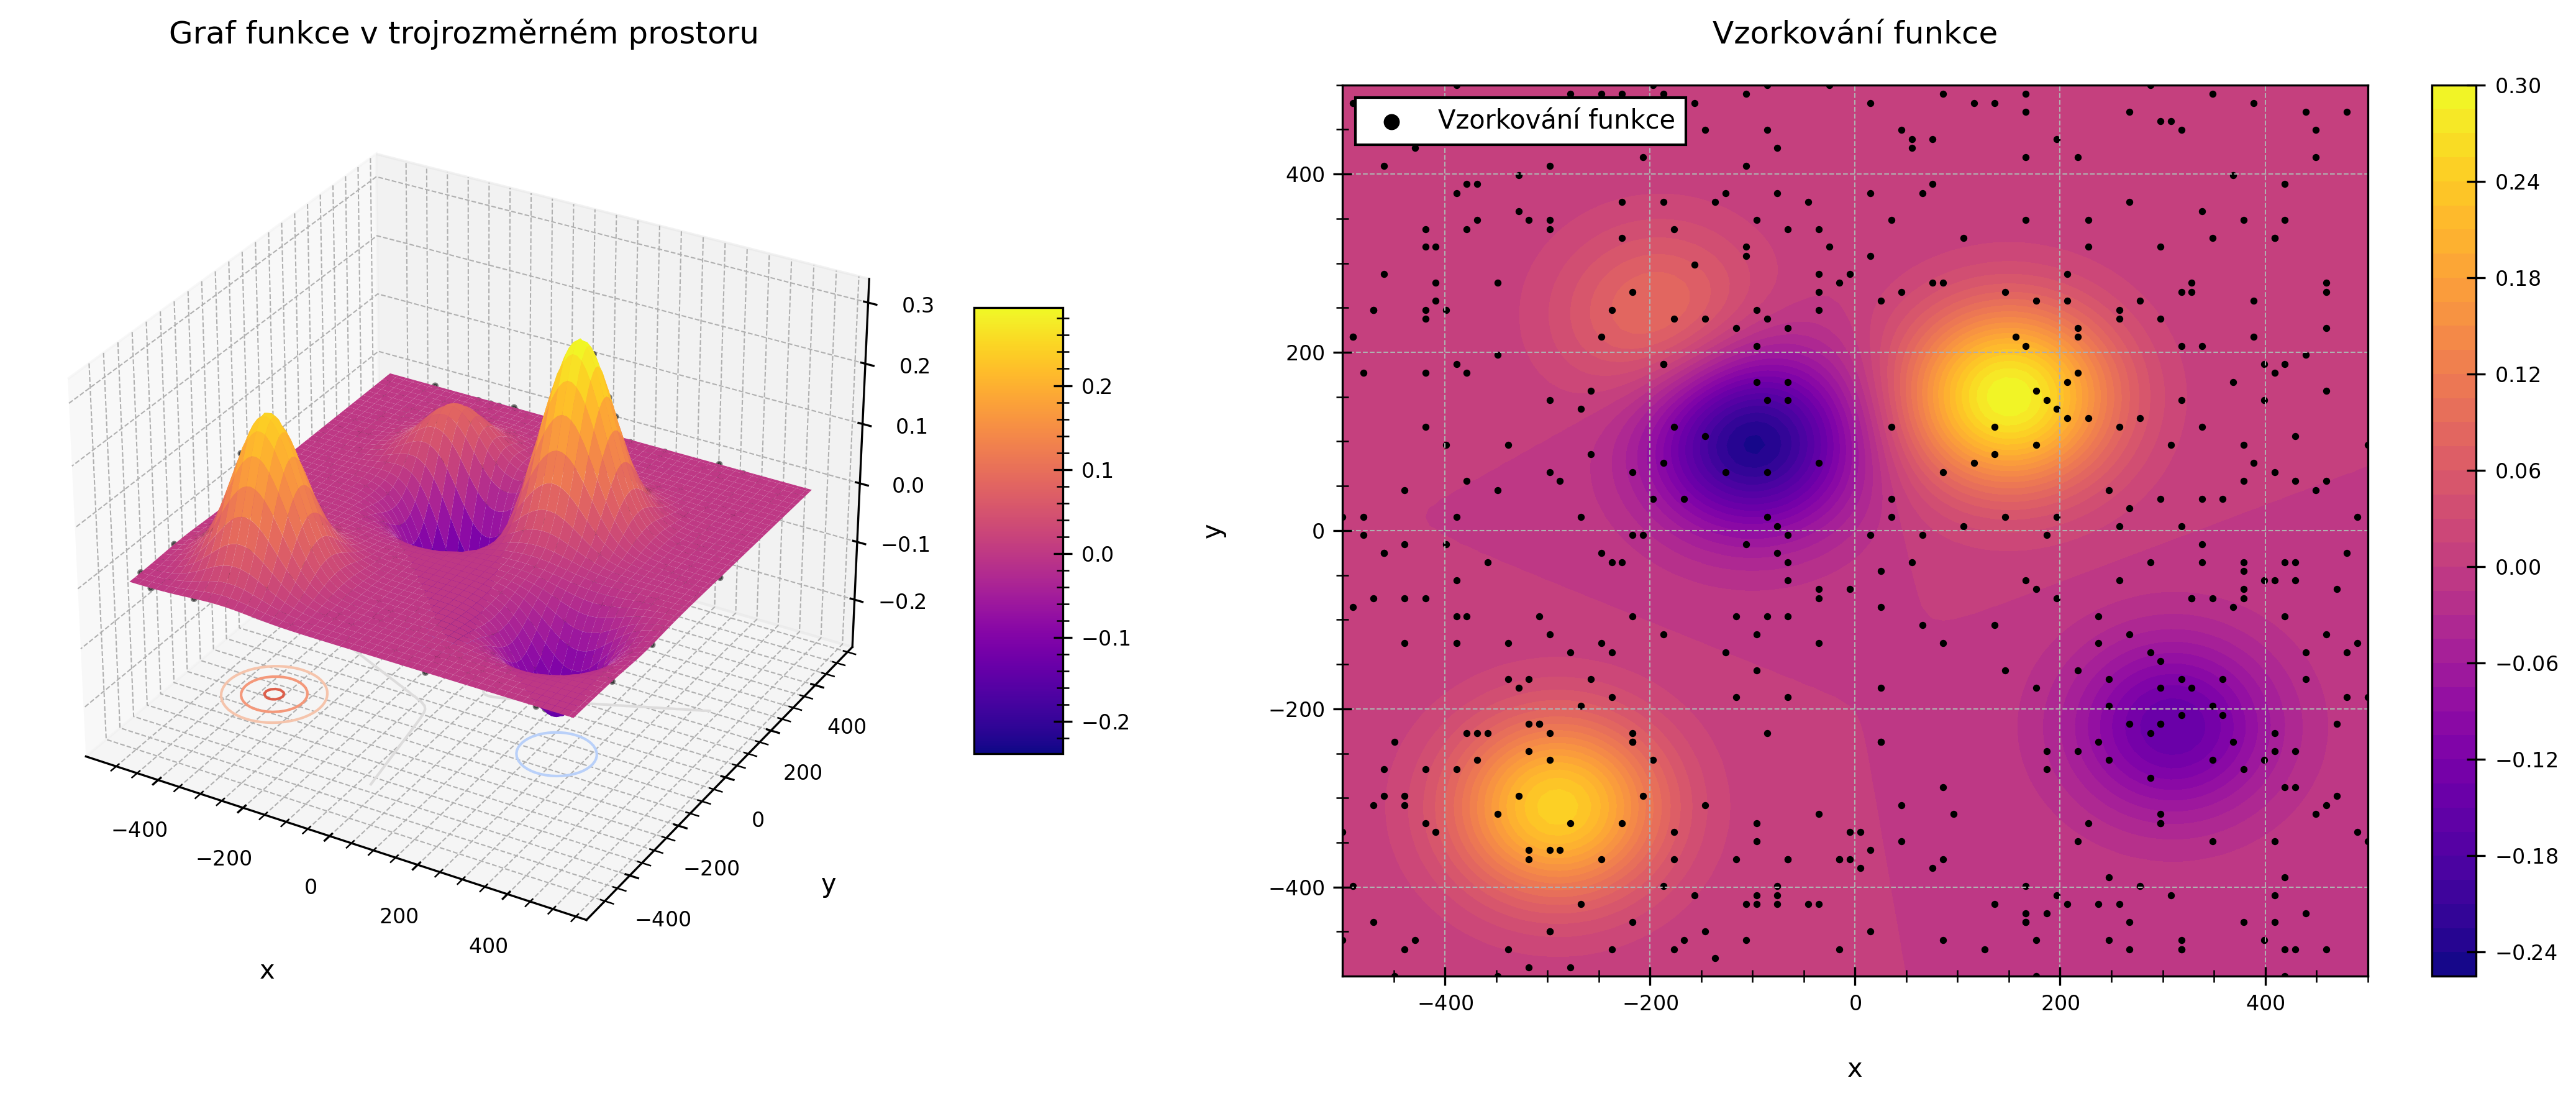

16:42:10	Values important for comparison of approximated values in 3_Train section: normMinMaxColor = [-0.24347023339288767, 0.2987879885373313].


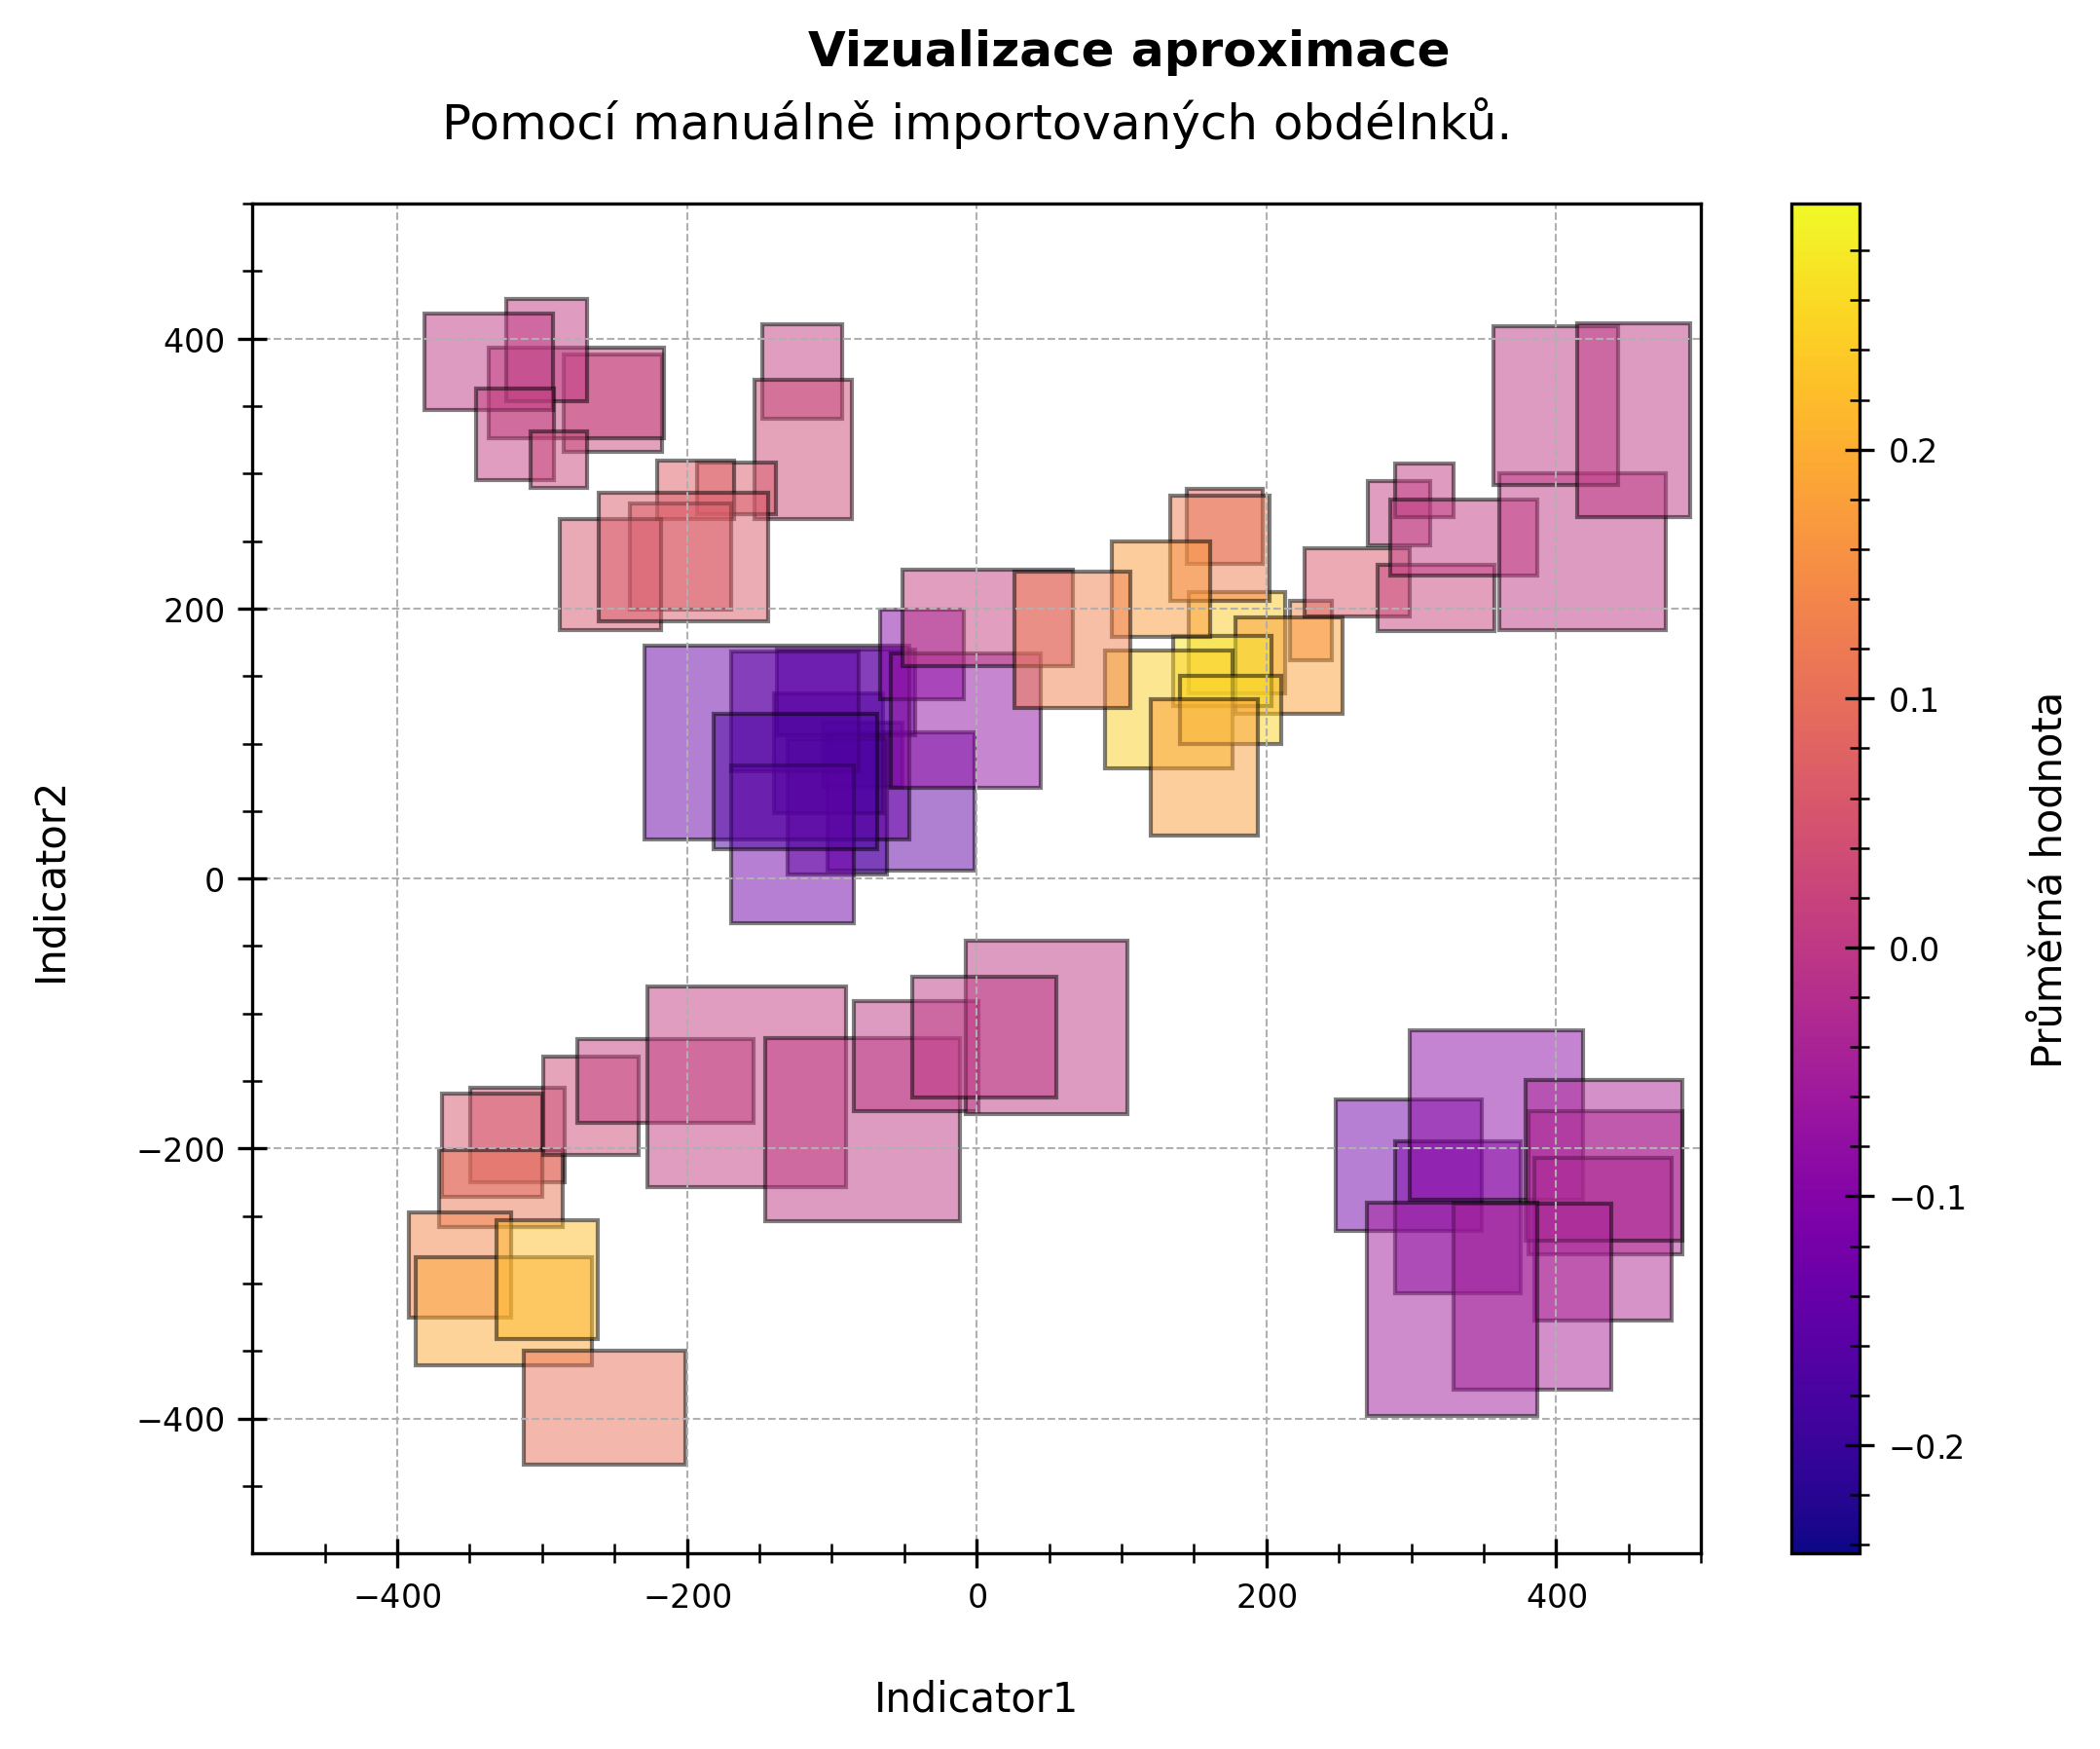

16:42:11	Execution time of [Pomocí manuálně importovaných obdélnků.]: 0.47432398796081543 seconds


In [14]:
SF_loaded = generate_function.SyntheticFunction(dimension=2, rootToLoad=root_directory+'1_GenerateFunction/generated_data/rootSamples_thesis.npz', samplesToLoad=root_directory+'1_GenerateFunction/generated_data/subsetSamples_thesis.npz')
SF_loaded.specialVizualization(samples=30, showGrid=True)
SF_loaded.plot(*(SF_loaded.subset_axes), SF_loaded.subset_values, plotDots=True)

# Visualization on manually selected rectangles
SF_loaded.specialVizualization(samples='manual', manualSamples={'file': root_directory+'3_Train/ValidationRectangles_Sampling/rectanglesValidation_mid.txt'}, showGrid=True)